<a href="https://colab.research.google.com/github/1lupoh/Ghost/blob/main/Regress%C3%A3o_Linear_para_C%C3%A1lculo_de_Aprova%C3%A7%C3%A3o_em_Vestibular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Insira o conceito do aluno (A, B, C ou D) ou 'fim' para encerrar: A
Insira a frequência do aluno (em porcentagem): 60
O aluno passou no vestibular? (sim ou nao): sim
Insira o conceito do aluno (A, B, C ou D) ou 'fim' para encerrar: B
Insira a frequência do aluno (em porcentagem): 75
O aluno passou no vestibular? (sim ou nao): sim
Insira o conceito do aluno (A, B, C ou D) ou 'fim' para encerrar: C
Insira a frequência do aluno (em porcentagem): 60
O aluno passou no vestibular? (sim ou nao): não
Insira o conceito do aluno (A, B, C ou D) ou 'fim' para encerrar: D
Insira a frequência do aluno (em porcentagem): 100
O aluno passou no vestibular? (sim ou nao): não
Insira o conceito do aluno (A, B, C ou D) ou 'fim' para encerrar: fim


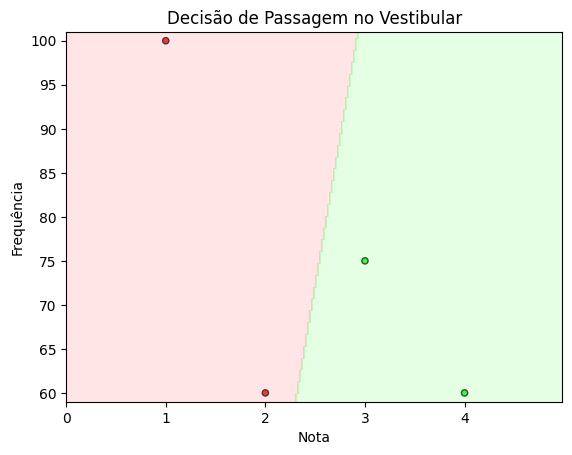

Insira o conceito do novo aluno (A, B, C ou D): B
Insira a frequência do novo aluno (em porcentagem): 60
O aluno provavelmente passou no vestibular.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression

# Função para converter o conceito em notas numéricas
def conceito_para_nota(conceito):
    if conceito == 'A':
        return 4
    elif conceito == 'B':
        return 3
    elif conceito == 'C':
        return 2
    elif conceito == 'D':
        return 1
    else:
        return 0  # Retorna 0 para valores inválidos

# Função para treinar o modelo
def treinar_modelo(notas, passou):
    modelo = LogisticRegression()
    modelo.fit(notas, passou)
    return modelo

# Função para plotar os dados e a linha de decisão
def plot_decision_boundary(X, y, modelo):
    h = .02  # step size na malha
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])  # cores para os pontos
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])  # cores para as áreas

    # Plotar os pontos
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlabel('Nota')
    plt.ylabel('Frequência')

    # Plotar a linha de decisão
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.3)

# Função para prever se um aluno vai passar ou não no vestibular
def prever_passagem(modelo, conceito, frequencia):
    nota = conceito_para_nota(conceito)
    novo_aluno = np.array([[nota, frequencia]])
    previsao = modelo.predict(novo_aluno)
    if previsao[0] == 1:
        return "passou"
    else:
        return "não passou"

# Pedir dados dos alunos
alunos = []
while True:
    conceito = input("Insira o conceito do aluno (A, B, C ou D) ou 'fim' para encerrar: ")
    if conceito.lower() == 'fim':
        break
    frequencia = float(input("Insira a frequência do aluno (em porcentagem): "))
    passou = input("O aluno passou no vestibular? (sim ou nao): ")
    if passou.lower() == 'sim':
        passou = 1
    else:
        passou = 0
    alunos.append({'conceito': conceito, 'frequencia': frequencia, 'passou': passou})

# Criar arrays de notas e passou
notas = np.array([[conceito_para_nota(aluno['conceito']), aluno['frequencia']] for aluno in alunos])
passou = np.array([aluno['passou'] for aluno in alunos])

# Treinar o modelo
modelo = treinar_modelo(notas, passou)

# Plotar os dados e a linha de decisão
plot_decision_boundary(notas, passou, modelo)

# Plotar detalhes
plt.title("Decisão de Passagem no Vestibular")
plt.show()

# Pedir dados de um novo aluno
conceito_novo_aluno = input("Insira o conceito do novo aluno (A, B, C ou D): ")
frequencia_novo_aluno = float(input("Insira a frequência do novo aluno (em porcentagem): "))

# Prever se o novo aluno vai passar ou não no vestibular
previsao = prever_passagem(modelo, conceito_novo_aluno, frequencia_novo_aluno)
print(f"O aluno provavelmente {previsao} no vestibular.")
D1